## Other Benchmarks

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import librosa

def condition_label(wav_array, annot, sr, neg_type=1, condition=0.1):
    if neg_type == 1:
        neg_id = np.where(annot != 1)[0]
        pos_id = np.where(annot == 1)[0]

        base_signal = wav_array.copy()
        neg_signal = wav_array.copy()

        for n in neg_id:
            n_init = int(n * sr / 2)
            base_signal[n_init:int(n_init+sr/2)] = np.nan

        for p in pos_id:
            p_init = int(p * sr / 2)
            neg_signal[p_init:int(p_init+sr/2)] = np.nan

    elif neg_type == 2:
        abs_wav = np.abs(wav_array)
        neg_id = []
        
        ix = 0
        while (ix * 1000 + 999) < len(abs_wav):
            i = ix * 1000
            if (np.sum(abs_wav[i:i+1000]) <= condition):
                neg_id += list(range(i, i+1000))
            
            ix += 1
            
        pos_id = list(set(list(range(len(wav_array)))) - set(neg_id))
        
        base_signal = wav_array.copy()
        neg_signal = wav_array.copy()
        
        base_signal[neg_id] = np.nan
        neg_signal[pos_id] = np.nan
        
    else:
        abs_wav = np.abs(wav_array)
        neg_id = []
        
        ix = 0
        while (ix * 2000 + 1999) < len(abs_wav):
            i = ix * 2000
            if (np.sum(abs_wav[i:i+2000]) <= condition):
                if annot[int(ix / (sr /2))] != 0:
                    neg_id += list(range(i, i+2000))
            
            ix += 1
            
        pos_id = list(set(list(range(len(wav_array)))) - set(neg_id))
        
        base_signal = wav_array.copy()
        neg_signal = wav_array.copy()
        
        base_signal[neg_id] = np.nan
        neg_signal[pos_id] = np.nan
        
    return base_signal, neg_signal

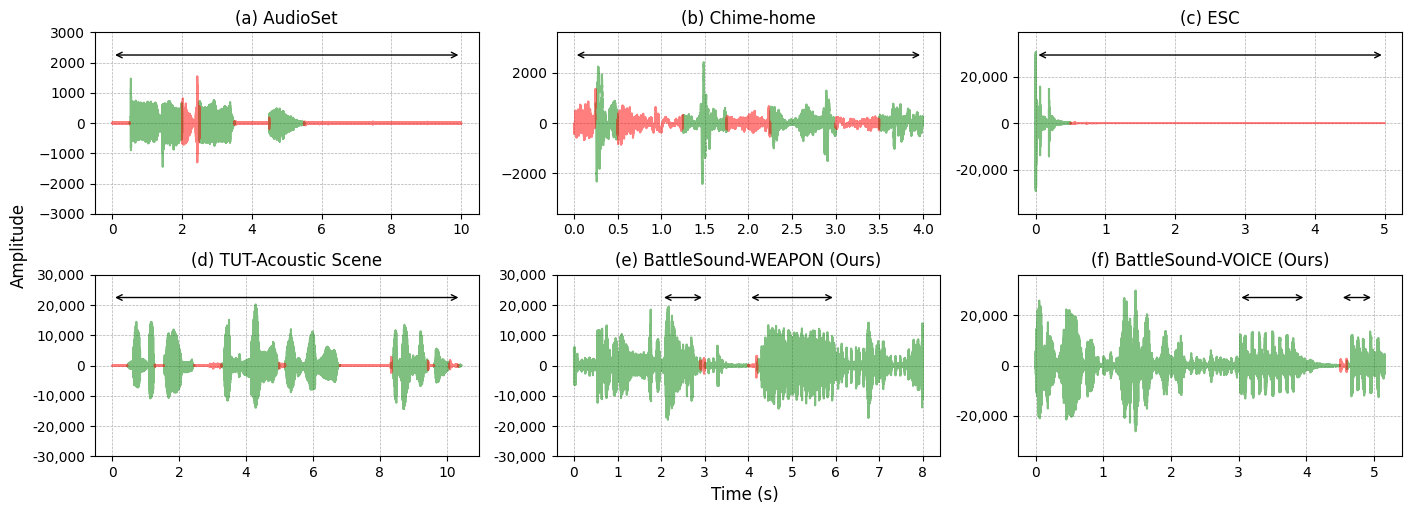

In [8]:
fig, axes = plt.subplots(2,3, figsize=(14,5))

# (a) Audioset
file_name = './samples_benchmarks/audioset.wav'
wav, sr = librosa.load(file_name)

init = sr * 16
wav = wav[init:(init + sr*10)]
t = np.array(list(range(0, len(wav)))) / sr # Time

annot= np.array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

b, n = condition_label(wav, annot, sr)
b *= 30000
n *= 30000
ax = axes.flatten()[0]
ax.plot(t, b, 'g', alpha=0.5)
ax.plot(t, n, 'r', alpha=0.5)
ax.grid(True, linewidth= 0.5, linestyle="--")
ax.set_title('(a) AudioSet')
ylim = 0.1 * 30000
ax.set_ylim(-ylim, ylim)
ax.annotate("", xy=(len(wav)/sr, ylim*0.75), xytext=(0., ylim*0.75), arrowprops=dict(arrowstyle="<->"))


# (b) Chime-Home
file_name = './samples_benchmarks/chime_home.wav'
wav, sr = librosa.load(file_name)

t = np.array(list(range(0, len(wav)))) / sr # Time

annot= np.array([0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1])

b, n = condition_label(wav, annot, int(sr/2))
b *= 30000
n *= 30000
ax = axes.flatten()[1]
ax.plot(t, b, 'g', alpha=0.5)
ax.plot(t, n, 'r', alpha=0.5)
ax.grid(True, linewidth= 0.5, linestyle="--")
ax.set_title('(b) Chime-home')
ylim = 0.12 * 30000
ax.set_ylim(-ylim, ylim)
ax.annotate("", xy=(len(wav)/sr, 0.75 * ylim), xytext=(0., 0.75 * ylim), arrowprops=dict(arrowstyle="<->"))


# (c) ESC (5s)
file_name = './samples_benchmarks/ESC.wav'
wav, sr = librosa.load(file_name)
t = np.array(list(range(0, len(wav)))) / sr # Time

annot= np.array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0])
b, n = condition_label(wav, annot, sr, neg_type=1)
b *= 30000
n *= 30000

ax = axes.flatten()[2]
ax.plot(t, b, 'g', alpha=0.5)
ax.plot(t, n, 'r', alpha=0.5)
ax.grid(True, linewidth= 0.5, linestyle="--")
ax.set_title('(c) ESC')
ax.set_yticks([-20000, 0, 20000])
ax.set_yticklabels(["-20,000", "0", "20,000"])

ylim = 1.3 * 30000
ax.set_ylim(-ylim, ylim)
ax.annotate("", xy=(len(wav)/sr, ylim * 0.75), xytext=(0., ylim * 0.75), arrowprops=dict(arrowstyle="<->"))


# (d) Libri-speech (5s)
file_name = './samples_benchmarks/librispeech.wav'
wav, sr = librosa.load(file_name)

t = np.array(list(range(0, len(wav)))) / sr # Time

annot= np.array([0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1])
b, n = condition_label(wav, annot, sr, neg_type=2, condition=10)
b *= 30000
n *= 30000
ax = axes.flatten()[3]
ax.plot(t, b, 'g', alpha=0.5)
ax.plot(t, n, 'r', alpha=0.5)
ax.grid(True, linewidth= 0.5, linestyle="--")
ax.set_title('(d) TUT-Acoustic Scene')
ylim = 1.0 * 30000
ax.set_ylim(-ylim, ylim)
ax.annotate("", xy=(len(wav)/sr, 0.75 * ylim), xytext=(0., 0.75 * ylim), arrowprops=dict(arrowstyle="<->"))

ax.set_yticks([-30000, -20000, -10000, 0, 10000, 20000, 30000])
ax.set_yticklabels(["-30,000", "-20,000", "-10,000", "0", "10,000", "20,000", "30,000"])

ax.set_xticks([0,1,2,3,4,5])
# Set the tick labels
ax.set_xticklabels(['0','2','4','6','8','10'])

# (e) Battlesound-GUN (0.5s)
file_name = './samples_benchmarks/battlesound_gun.wav'
wav, sr = librosa.load(file_name)
wav = wav[:8*sr]
t = np.array(list(range(0, len(wav)))) / sr # Time

annot= np.load('./samples_benchmarks/battlesound_gun.npy')

b = wav * 30000
n = np.array([np.nan] * len(wav))
n[int(2.9 * sr):int(3.0 * sr)] = b[int(2.9 * sr):int(3.0 * sr)]
b[int(2.9 * sr):int(3.0 * sr)] = np.nan

n[int(4.0 * sr):int(4.2 * sr)] = b[int(4.0 * sr):int(4.2 * sr)]
b[int(4.0 * sr):int(4.2 * sr)] = np.nan

ax = axes.flatten()[4]
ax.plot(t, b, 'g', alpha=0.5)
ax.plot(t, n, 'r', alpha=0.5)
ax.grid(True, linewidth= 0.5, linestyle="--")
ax.set_title('(e) BattleSound-WEAPON (Ours)')
ylim = 1.0 * 30000
ax.set_ylim(-ylim, ylim)

ax.set_yticks([-30000, -20000, -10000, 0, 10000, 20000, 30000])
ax.set_yticklabels(["-30,000", "-20,000", "-10,000", "0", "10,000", "20,000", "30,000"])

ax.annotate("", xy=(3.0, ylim * 0.75), xytext=(2.0, ylim * 0.75), arrowprops=dict(arrowstyle="<->"))
ax.annotate("", xy=(6.0, ylim * 0.75), xytext=(4.0, ylim * 0.75), arrowprops=dict(arrowstyle="<->"))


# (f) Battlesound-VOICE (0.5s)
file_name = './samples_benchmarks/battlesound_voice.wav'
wav, sr = librosa.load(file_name)
t = np.array(list(range(0, len(wav)))) / sr # Time

annot= np.load('./samples_benchmarks/battlesound_voice.npy')
b = wav * 30000
n = np.array([np.nan] * len(wav))
n[int(4.5 * sr):int(4.6 * sr)] = b[int(4.5 * sr):int(4.6 * sr)]
b[int(4.5 * sr):int(4.6 * sr)] = np.nan

ax = axes.flatten()[5]
ax.plot(t, b, 'g', alpha=0.5)
ax.plot(t, n, 'r', alpha=0.5)
ax.grid(True, linewidth= 0.5, linestyle="--")
ax.set_title('(f) BattleSound-VOICE (Ours)')

ax.set_yticks([-20000, 0, 20000])
ax.set_yticklabels(["-20,000", "0", "20,000"])

ylim = 1.2 * 30000
ax.set_ylim(-ylim, ylim)
ax.annotate("", xy=(4.0, ylim * 0.75), xytext=(3.0, ylim * 0.75), arrowprops=dict(arrowstyle="<->"))
ax.annotate("", xy=(5.0, ylim * 0.75), xytext=(4.5, ylim * 0.75), arrowprops=dict(arrowstyle="<->"))
            
fig.set_facecolor('w')

fig.text(0.5+0.02, -0.01, 'Time (s)', ha='center', fontsize=12)
fig.text(-0.005, 0.5, 'Amplitude', va='center', rotation='vertical', fontsize=12)

plt.tight_layout()

## Intra-class Variations

/tmp/ipykernel_1256/2701664734.py:8: WavFileWarning: Reached EOF prematurely; finished at 40804431 bytes, expected 4294967303 bytes from header.
  sr, wav = read(file_name)
/tmp/ipykernel_1256/2701664734.py:13: FutureWarning: Pass orig_sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  wav = librosa.resample(wav, sr, target_sr=16000)


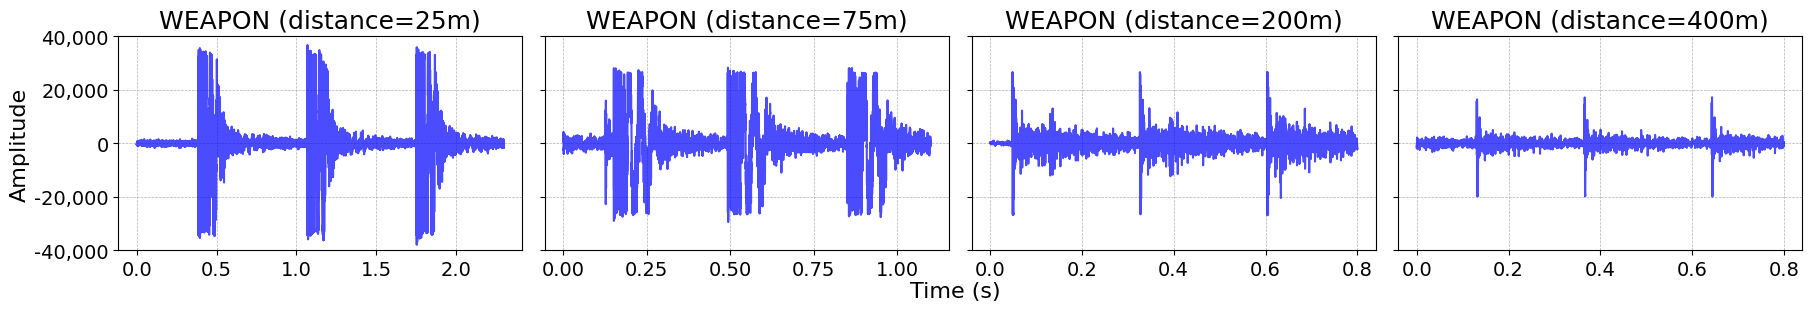

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io.wavfile import read
import librosa

# Load a WAV file
file_name = './samples_dist/distance_gun.wav'
sr, wav = read(file_name)
wav = wav.astype('float')
wav = wav[:, 0]

# Resample
wav = librosa.resample(wav, sr, target_sr=16000)
sr = 16000

color = 'blue'
alpha = 0.7

# Plot
fig, axes = plt.subplots(1,4, figsize=(18,3))

start = 37
wav_4 = wav[start* sr : int((start+2.3) * sr)]
t4 = np.array(list(range(0, len(wav_4)))) / sr

ax = axes.flatten()[0]
ax.plot(t4, wav_4, color=color, alpha=alpha)
ax.grid(True, linewidth= 0.5, linestyle="--")
ax.set_ylim(-40000, 40000)
ax.set_title('WEAPON (distance=25m)', fontsize=18)

ax.set_yticks([-40000, -20000, 0, 20000, 40000])
ax.set_yticklabels(["-40,000", "-20,000", "0", "20,000", "40,000"])

ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)


start = 48
wav_4 = wav[int(start* sr) : int((start+1.1) * sr)] * 0.8
t4 = np.array(list(range(0, len(wav_4)))) / sr

ax = axes.flatten()[1]
ax.plot(t4, wav_4, color=color, alpha=alpha)
ax.grid(True, linewidth= 0.5, linestyle="--")
ax.set_ylim(-40000, 40000)
ax.set_yticklabels([])
ax.set_title('WEAPON (distance=75m)', fontsize=18)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)

start = 93.8
wav_4 = wav[int(start* sr) : int((start+0.8) * sr)] * 0.8
t4 = np.array(list(range(0, len(wav_4)))) / sr

ax = axes.flatten()[2]
ax.plot(t4, wav_4, color=color, alpha=alpha)
ax.grid(True, linewidth= 0.5, linestyle="--")
ax.set_ylim(-40000, 40000)
ax.set_yticklabels([])
ax.set_title('WEAPON (distance=200m)', fontsize=18)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)

start = 116
wav_4 = wav[int(start* sr) : int((start+0.8) * sr)] * 0.6
t4 = np.array(list(range(0, len(wav_4)))) / sr

ax = axes.flatten()[3]
ax.plot(t4, wav_4, color=color, alpha=alpha)
ax.grid(True, linewidth= 0.5, linestyle="--")
ax.set_ylim(-40000, 40000)
ax.set_yticklabels([])
ax.set_title('WEAPON (distance=400m)', fontsize=18)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)

# Total
fig.set_facecolor('w')
fig.text(0.5+0.02, -0.01, 'Time (s)', ha='center', fontsize=16)
fig.text(-0.005, 0.5, 'Amplitude', va='center', rotation='vertical', fontsize=16)

# Total Axis
# fig.text(0.5+0.02, -0.04, '(a) WEAPON sound depending on the distance', ha='center', fontsize=12)
plt.tight_layout() 



/tmp/ipykernel_1256/3470854721.py:8: WavFileWarning: Reached EOF prematurely; finished at 256671823 bytes, expected 4294967303 bytes from header.
  sr, wav = read(file_name)
/tmp/ipykernel_1256/3470854721.py:13: FutureWarning: Pass orig_sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  wav = librosa.resample(wav, sr, target_sr=16000)


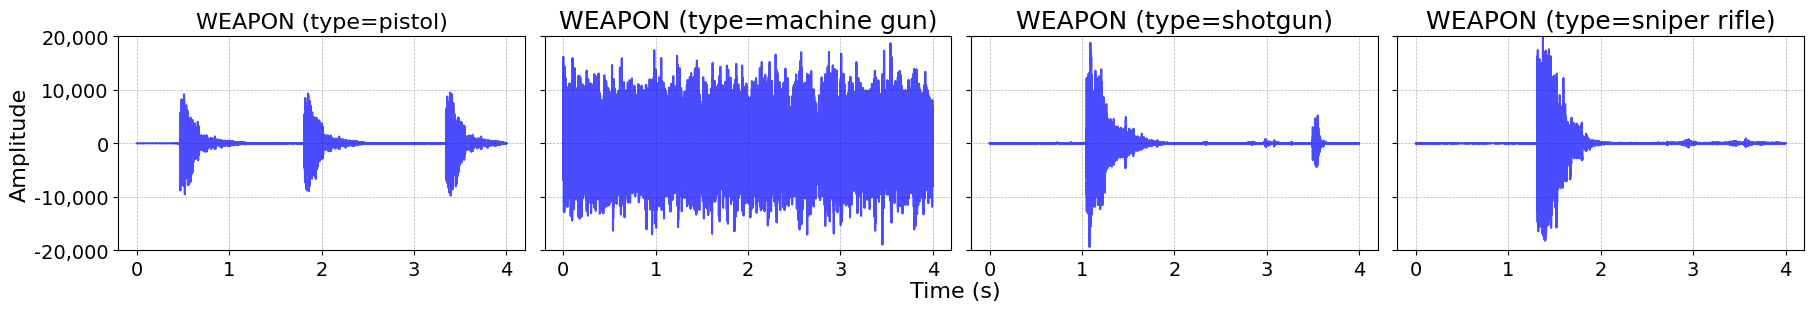

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io.wavfile import read
import librosa

# Load WAV file for gun kind
file_name = './samples_kind/gun_kind.wav'
sr, wav = read(file_name)
wav = wav.astype('float')
wav = wav[:, 0]

# Resample
wav = librosa.resample(wav, sr, target_sr=16000)
sr = 16000

fig, axes = plt.subplots(1,4, figsize=(18,3))
color = 'blue'
alpha = 0.7

# Kind 1
start = 1 * 60 + 11.5
wav_4 = wav[int(start* sr) : int((start+4) * sr)] * 0.8
t4 = np.array(list(range(0, len(wav_4)))) / sr

ax = axes.flatten()[0]
ax.plot(t4, wav_4, color=color, alpha=alpha)
ax.grid(True, linewidth= 0.5, linestyle="--")
ax.set_ylim(-20000, 20000)
ax.set_title('WEAPON (type=pistol)', fontsize=16)

ax.set_yticks([-20000, -10000, 0, 10000, 20000])
ax.set_yticklabels(["-20,000", "-10,000", "0", "10,000", "20,000"])

ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)

# Kind 2
start = 6 * 60 + 8
wav_4 = wav[int(start* sr) : int((start+4) * sr)]
t4 = np.array(list(range(0, len(wav_4)))) / sr

ax = axes.flatten()[1]
ax.plot(t4, wav_4, color=color, alpha=alpha)
ax.grid(True, linewidth= 0.5, linestyle="--")
ax.set_yticklabels([])
ax.set_ylim(-20000, 20000)
ax.set_title('WEAPON (type=machine gun)', fontsize=18)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)

# Kind 3
start = 22 * 60 + 56
wav_4 = wav[int(start* sr) : int((start+4) * sr)]
t4 = np.array(list(range(0, len(wav_4)))) / sr

ax = axes.flatten()[2]
ax.plot(t4, wav_4, color=color, alpha=alpha)
ax.grid(True, linewidth= 0.5, linestyle="--")
ax.set_yticklabels([])
ax.set_ylim(-20000, 20000)
ax.set_title('WEAPON (type=shotgun)', fontsize=18)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)

# Kind 4
start = 14 * 60 + 6
wav_4 = wav[int(start* sr) : int((start+4) * sr)]
t4 = np.array(list(range(0, len(wav_4)))) / sr

ax = axes.flatten()[3]
ax.plot(t4, wav_4, color=color, alpha=alpha)
ax.grid(True, linewidth= 0.5, linestyle="--")
ax.set_yticklabels([])
ax.set_ylim(-20000, 20000)
ax.set_title('WEAPON (type=sniper rifle)', fontsize=18)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)

# Total
fig.set_facecolor('w')
fig.text(0.5+0.02, -0.01, 'Time (s)', ha='center', fontsize=16)
fig.text(-0.005, 0.5, 'Amplitude', va='center', rotation='vertical', fontsize=16)

# Total Axis
# fig.text(0.5+0.02, -0.04, '(a) WEAPON sound depending on the distance', ha='center', fontsize=12)
plt.tight_layout() 

/tmp/ipykernel_1256/2231315155.py:8: WavFileWarning: Reached EOF prematurely; finished at 21651535 bytes, expected 4294967303 bytes from header.
  sr, wav = read(file_name)
/tmp/ipykernel_1256/2231315155.py:13: FutureWarning: Pass orig_sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  wav = librosa.resample(wav, sr, target_sr=16000)


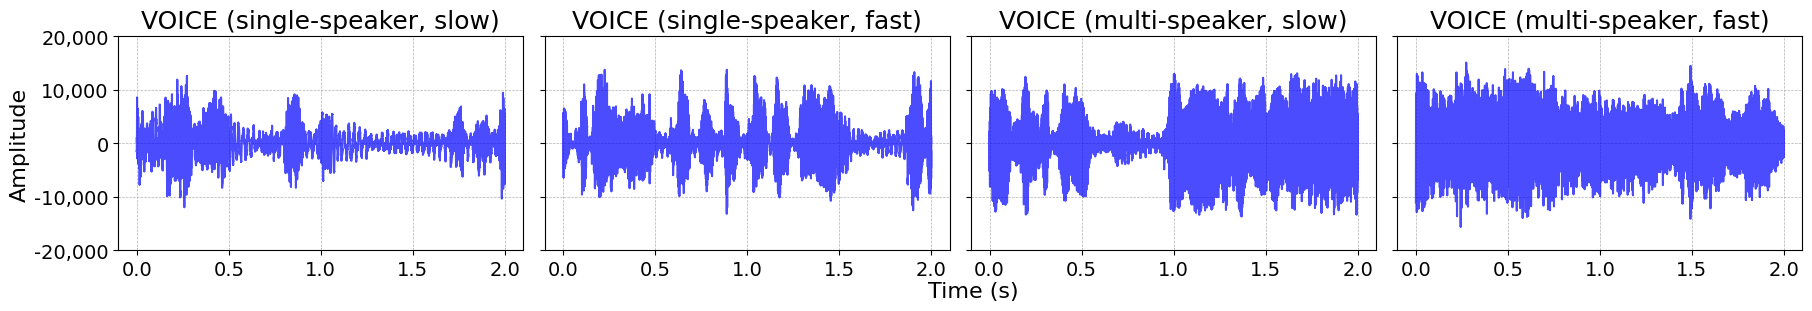

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io.wavfile import read
import librosa

# Load WAV file for voice
file_name = './samples_voice/voice.wav'
sr, wav = read(file_name)
wav = wav.astype('float')
wav = wav[:, 0]

# Resample
wav = librosa.resample(wav, sr, target_sr=16000)
sr = 16000
fig, axes = plt.subplots(1,4, figsize=(18,3))

color = 'blue'
alpha = 0.7

# Single Speaker
start = 0 * 60 + 18
wav_4 = wav[int(start* sr) : int((start+2) * sr)] * 5
t4 = np.array(list(range(0, len(wav_4)))) / sr

ax = axes.flatten()[0]
ax.plot(t4, wav_4, color=color, alpha=alpha)
ax.grid(True, linewidth= 0.5, linestyle="--")
ax.set_title('VOICE (single-speaker, slow)', fontsize=18)
ax.set_ylim(-20000, 20000)


ax.set_yticks([-20000, -10000, 0, 10000, 20000])
ax.set_yticklabels(["-20,000", "-10,000", "0", "10,000", "20,000"])

ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)

# Single Speaker
start = 0 * 60 + 35
wav_4 = wav[int(start* sr) : int((start+2) * sr)] * 3
t4 = np.array(list(range(0, len(wav_4)))) / sr

ax = axes.flatten()[1]
ax.plot(t4, wav_4, color=color, alpha=alpha)
ax.grid(True, linewidth= 0.5, linestyle="--")
ax.set_title('VOICE (single-speaker, fast)', fontsize=18)
ax.set_ylim(-20000, 20000)
ax.set_yticklabels([])
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)

# Multi-speaker
start = 0 * 60 + 26
wav_4 = wav[int(start* sr) : int((start+2) * sr)] * 3
t4 = np.array(list(range(0, len(wav_4)))) / sr

ax = axes.flatten()[2]
ax.plot(t4, wav_4, color=color, alpha=alpha)
ax.grid(True, linewidth= 0.5, linestyle="--")
ax.set_title('VOICE (multi-speaker, slow)', fontsize=18)
ax.set_ylim(-20000, 20000)
ax.set_yticklabels([])
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)

# Multi-speaker
start = 0 * 60 + 58
wav_4 = wav[int(start* sr) : int((start+2) * sr)]
t4 = np.array(list(range(0, len(wav_4)))) / sr

ax = axes.flatten()[3]
ax.plot(t4, wav_4, color=color, alpha=alpha)
ax.grid(True, linewidth= 0.5, linestyle="--")
ax.set_title('VOICE (multi-speaker, fast)', fontsize=18)
ax.set_ylim(-20000, 20000)
ax.set_yticklabels([])
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)

# Total
fig.set_facecolor('w')
fig.text(0.5+0.03, -0.01, 'Time (s)', ha='center', fontsize=16)
fig.text(-0.005, 0.5, 'Amplitude', va='center', rotation='vertical', fontsize=16)

# Total Axis
# fig.text(0.5+0.02, -0.04, '(a) WEAPON sound depending on the distance', ha='center', fontsize=12)
plt.tight_layout() 

## Data Statistics

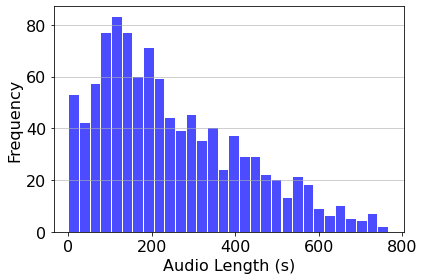

In [7]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

with open('stat.pkl', 'rb') as f:
    data = pickle.load(f)

# example data
fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(data, bins=30, rwidth=0.9, color='blue', alpha=0.7)


# add a 'best fit' line
ax.set_xlabel('Audio Length (s)', fontsize=16)
ax.set_ylabel('Frequency', fontsize=16)
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)

plt.grid(axis='y', alpha=0.75)

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

## Voice Samples Representations

In [1]:

from glob import glob
import numpy as np

voice_list = glob('../sample/voice/*.npz')

ind_list_0, ind_list_1 = [], []
for ix in range(20):
    voice = dict(np.load(voice_list[ix]))
    
    for ix2 in range(len(voice['label'])):
        if voice['label'][ix2] == 0:
            ind_list_0.append((ix, ix2))
        elif voice['label'][ix2] == 1: 
            ind_list_1.append((ix, ix2))
        else:
            pass
        
# Index
id, ix = ind_list_1[0]

# Samples
voice = dict(np.load(voice_list[id]))
wav = voice['audio'][ix]
wav_voice = wav.astype('float')

IndexError: list index out of range

In [2]:
from glob import glob
import numpy as np

voice_list = glob('../sample/voice/*.npz')

ind_list_0, ind_list_1 = [], []
for ix in range(20):
    voice = dict(np.load(voice_list[ix]))
    
    for ix2 in range(len(voice['label'])):
        if voice['label'][ix2] == 0:
            ind_list_0.append((ix, ix2))
        elif voice['label'][ix2] == 1: 
            ind_list_1.append((ix, ix2))
        else:
            pass
        
# Index
id, ix = ind_list_1[0]

# Samples
voice = dict(np.load(voice_list[id]))
wav = voice['audio'][ix]
wav_voice = wav.astype('float')

## Samples of BattleSound (Audio / Spectrogram / Mel-spectrogram)

In [28]:
from glob import glob
from collections import defaultdict
import numpy as np
data_list = glob('/data/sung/dataset/dongwoon/val/*.npz')
output = defaultdict(list)

for id, data in enumerate(data_list):
    data = dict(np.load(data))
    for ix in range(len(data['label'])):
        output[data['label'][ix]].append((id, ix))
        
    if id == 200:
        break
    

wav_voice = dict(np.load(data_list[output[0][3][0]]))['audio'][output[0][3][1]*8000 : (output[0][3][1]+1)*8000].astype('float')
wav_gun = dict(np.load(data_list[output[1][4][0]]))['audio'][output[1][4][1]*8000 : (output[1][4][1]+1)*8000].astype('float') 
wav_mix = dict(np.load(data_list[output[2][3][0]]))['audio'][output[2][3][1]*8000 : (output[2][3][1]+1)*8000].astype('float')
# wav_others = dict(np.load(data_list[output[3][3][0]]))['audio'][output[3][3][1]*8000 : (output[3][3][1]+1)*8000].astype('float')

In [29]:
def extract_mel_spec(signal, sample_rate=16000):
    # In Annotation
    unit_time = 0.25

    # Load wav file into numpy array
    duration = (len(signal) / sample_rate // unit_time) * unit_time

    start_time = 0
    signal = signal[int(start_time * sample_rate):int((start_time + duration) * sample_rate)]

    pre_emphasis = 0.97
    emphasized_signal = np.append(signal[0], signal[1:] - pre_emphasis * signal[:-1])

    # Framing
    frame_size = 0.025
    frame_stride = frame_size / 2

    frame_length, frame_step = frame_size * sample_rate, frame_stride * sample_rate  # Convert from seconds to samples
    signal_length = len(emphasized_signal)
    frame_length = int(round(frame_length))
    frame_step = int(round(frame_step))
    num_frames = 3 + (signal_length - frame_length) // frame_step # padding 2 frames
    # num_frames = int(np.ceil(float(np.abs(signal_length - frame_length)) / frame_step))
    z = np.zeros(int(frame_length / 2))
    pad_signal = np.concatenate([z, emphasized_signal, z]) # Pad Signal to make sure that all frames have equal number of samples without truncating any samples from the original signal

    indices = np.tile(np.arange(0, frame_length), (num_frames, 1)) + np.tile(np.arange(0, num_frames * frame_step, frame_step), (frame_length, 1)).T
    num_time_bin = indices.shape[0]
    
    frames = pad_signal[indices.astype(np.int32, copy=False)]

    # Hamming Window
    frames *= np.hamming(frame_length)

    # Fourier-Transform and Power Spectrum
    NFFT = 512

    mag_frames = np.absolute(np.fft.rfft(frames, NFFT))  # Magnitude of the FFT
    spec_frames = mag_frames**2

    weighting = np.hanning(frame_length)[:, None]
    scale = np.sum(weighting**2) * sample_rate
    spec_frames[1:-1, :] *= (2.0 / scale)
    spec_frames[(0, -1), :] /= scale

    freqs = float(sample_rate) / frame_length * np.arange(spec_frames.shape[0])
    eps = 1e-14
    spectrogram = np.transpose(np.log(spec_frames + eps))

    # Mel    
    nfilt = 41
    pow_frames = ((1.0 / NFFT) * ((mag_frames) ** 2))  # Power Spectrum
    min_freq = 300
    max_freq = 8000

    low_freq_mel = (2595 * np.log10(1 + min_freq / 700))
    high_freq_mel = (2595 * np.log10(1 + max_freq / 700))  # Convert Hz to Mel
    mel_points = np.linspace(low_freq_mel, high_freq_mel, nfilt + 2)  # Equally spaced in Mel scale
    hz_points = (700 * (10**(mel_points / 2595) - 1))  # Convert Mel to Hz
    bin = np.floor((NFFT + 1) * hz_points / sample_rate)

    fbank = np.zeros((nfilt, int(np.floor(NFFT / 2 + 1))))
    for m in range(1, nfilt + 1):
        f_m_minus = int(bin[m - 1])   # left
        f_m = int(bin[m])             # center
        f_m_plus = int(bin[m + 1])    # right

        for k in range(f_m_minus, f_m):
            fbank[m - 1, k] = (k - bin[m - 1]) / (bin[m] - bin[m - 1])
        for k in range(f_m, f_m_plus):
            fbank[m - 1, k] = (bin[m + 1] - k) / (bin[m + 1] - bin[m])
    filter_banks = np.dot(pow_frames, fbank.T)
    filter_banks = np.where(filter_banks == 0, np.finfo(float).eps, filter_banks)  # Numerical Stability
    filter_banks = 20 * np.log10(filter_banks)  # dB

    filter_banks = filter_banks.T
    return spectrogram, filter_banks

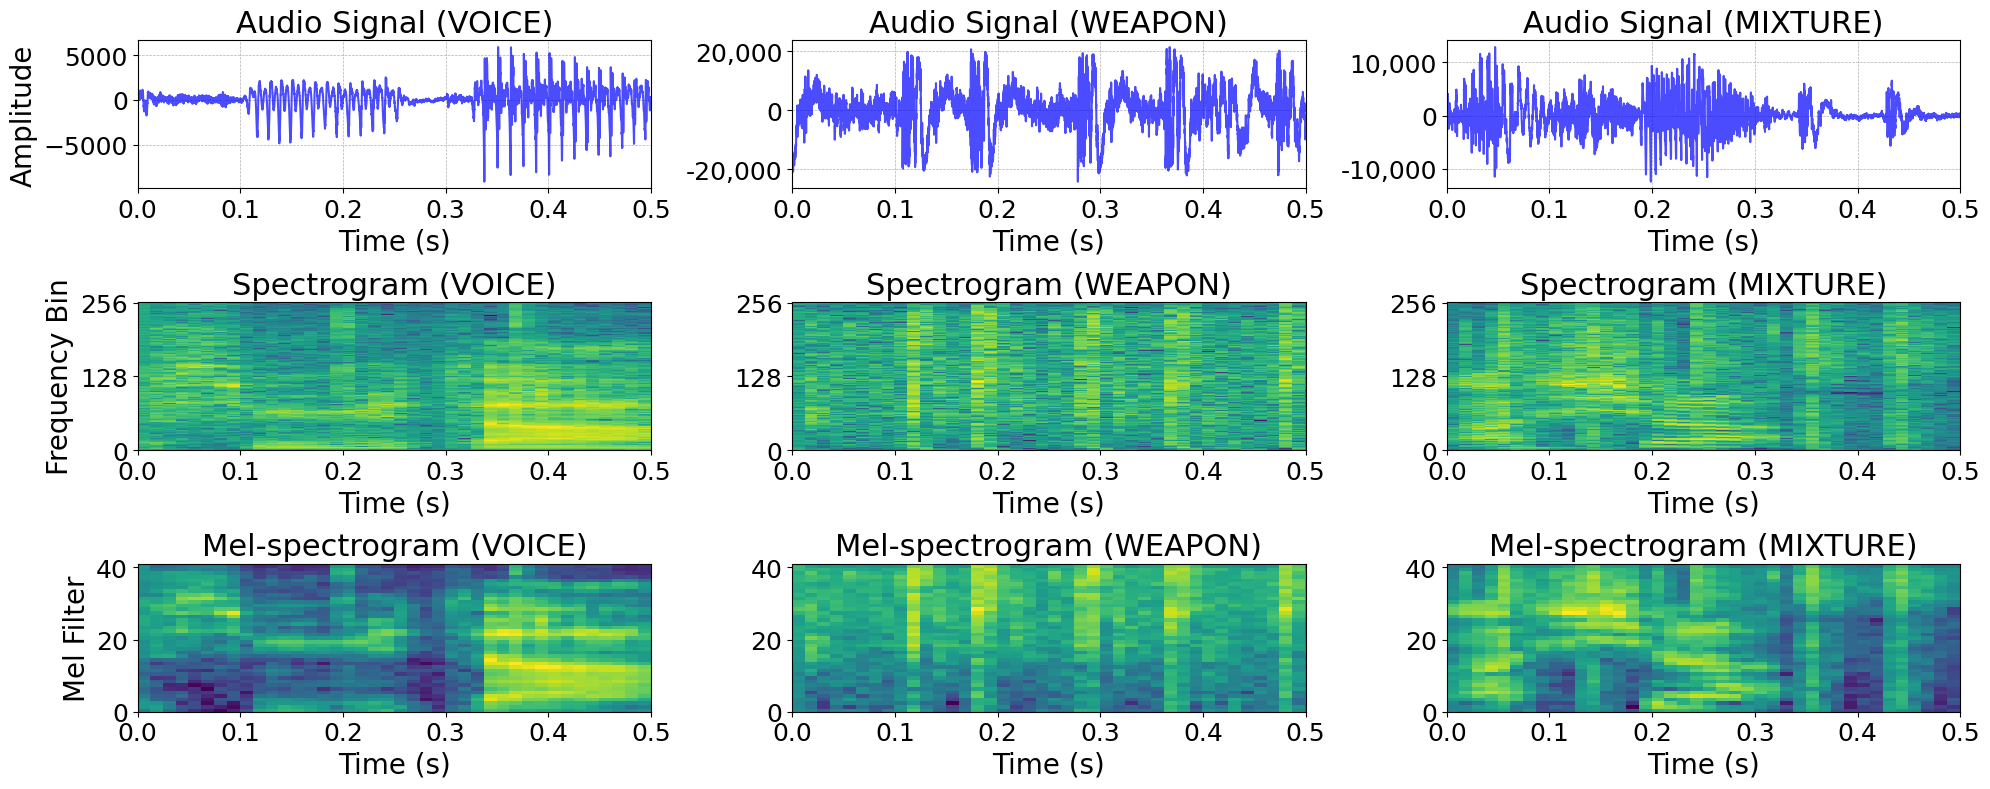

In [30]:
import matplotlib.pyplot as plt

def sub_figure(wav, sr, axes, ix, title='VOICE', color='#607c8e', alpha=0.8):
    # Visualize Audio Signal
    t = np.array(list(range(0, len(wav)))) / sr

    title_size = 22
    x_size, y_size = 20, 20
    label_size = 18
    
    ax = axes.flatten()[ix]
    ax.plot(t, wav, color='blue', alpha=0.7)
    ax.grid(True, linewidth= 0.5, linestyle="--")
    
    if ix == 0:
        ax.set_ylabel('Amplitude', fontsize=y_size)
    ax.set_xlabel('Time (s)', fontsize=x_size)
    ax.set_title('Audio Signal (%s)' %title, fontsize=title_size)
    
    if ix == 1:
        ax.set_yticks([-20000, 0, 20000])    
        ax.set_yticklabels(["-20,000", "0", "20,000"])
    elif ix == 2:
        ax.set_yticks([-10000, 0, 10000])    
        ax.set_yticklabels(["-10,000", "0", "10,000"])
    
        
    ax.xaxis.set_tick_params(labelsize=label_size)
    ax.yaxis.set_tick_params(labelsize=label_size)
    ax.set_xlim(0.0, 0.5)
    
    # Visualize Spec
    spectrogram, mel_spectrogram = extract_mel_spec(wav, sample_rate=sr)
    
    ax = axes.flatten()[ix+3]
    img = ax.pcolor(spectrogram)
    ax.xaxis.set_tick_params(labelsize=label_size)
    ax.yaxis.set_tick_params(labelsize=label_size)
    
    if ix == 0:
        ax.set_ylabel('Frequency Bin', fontsize=y_size)
    ax.set_xlim(0., 40.)
    ax.set_xticks([0, 8, 16, 24, 32, 40])    
    ax.set_xticklabels([0.0, 0.1, 0.2, 0.3, 0.4, 0.5])
    ax.set_yticks([0, 128, 256])    
    ax.set_xlabel('Time (s)', fontsize=x_size)
    ax.set_title('Spectrogram (%s)' %title, fontsize=title_size)
    
    # Visualize Mel Spec
    ax = axes.flatten()[ix+6]
    # S = librosa.feature.melspectrogram(y=wav, sr=sr, n_mels=40, n_fft=256, hop_length=400, win_length=200)
    # S_dB = librosa.power_to_db(S, ref=np.max)
    # img = librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr, fmax=8000, ax=ax)
    img = ax.pcolor(mel_spectrogram)
    ax.set_xlim(0., 40.)
    ax.set_xticks([0, 8, 16, 24, 32, 40])    
    ax.set_xticklabels([0.0, 0.1, 0.2, 0.3, 0.4, 0.5])
    
    ax.set_yticks([0, 20, 40])    
    
    ax.xaxis.set_tick_params(labelsize=label_size)
    ax.yaxis.set_tick_params(labelsize=label_size)
    
    if ix == 0:
        ax.set_ylabel('Mel Filter', fontsize=y_size)
    ax.set_xlabel('Time (s)', fontsize=x_size)
    ax.set_title('Mel-spectrogram (%s)' %title, fontsize=title_size)
    return img

sr = 16000 
color = '#607c8e'
fig, axes = plt.subplots(3,3, figsize=(20,8))
sub_figure(wav_voice, sr, axes, ix=0, title='VOICE', color=color)
sub_figure(wav_gun, sr, axes, ix=1, title='WEAPON', color=color)
sub_figure(wav_mix, sr, axes, ix=2, title='MIXTURE', color=color)
# img = sub_figure(wav_others, sr, axes, ix=3, title='OTHERS', color=color)
plt.tight_layout()

# fig.subplots_adjust(right=0.9)
# cbar_ax = fig.add_axes([0.93, 0.15, 0.01, 0.7])
# cbar = fig.colorbar(img, cax=cbar_ax, format='%+2.0f dB', ticks=[20, 60, 100, 140])
# cbar.ax.tick_params(labelsize=14)
plt.savefig('imp.png', dpi=300)


## Select Best Samples for GradCAM and Visualization

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

def extract_mel_spec(signal, sample_rate=16000):
    # In Annotation
    unit_time = 0.25

    # Load wav file into numpy array
    duration = (len(signal) / sample_rate // unit_time) * unit_time

    start_time = 0
    signal = signal[int(start_time * sample_rate):int((start_time + duration) * sample_rate)]

    pre_emphasis = 0.97
    emphasized_signal = np.append(signal[0], signal[1:] - pre_emphasis * signal[:-1])

    # Framing
    frame_size = 0.025
    frame_stride = frame_size / 2

    frame_length, frame_step = frame_size * sample_rate, frame_stride * sample_rate  # Convert from seconds to samples
    signal_length = len(emphasized_signal)
    frame_length = int(round(frame_length))
    frame_step = int(round(frame_step))
    num_frames = 3 + (signal_length - frame_length) // frame_step # padding 2 frames
    # num_frames = int(np.ceil(float(np.abs(signal_length - frame_length)) / frame_step))
    z = np.zeros(int(frame_length / 2))
    pad_signal = np.concatenate([z, emphasized_signal, z]) # Pad Signal to make sure that all frames have equal number of samples without truncating any samples from the original signal

    indices = np.tile(np.arange(0, frame_length), (num_frames, 1)) + np.tile(np.arange(0, num_frames * frame_step, frame_step), (frame_length, 1)).T
    num_time_bin = indices.shape[0]
    
    frames = pad_signal[indices.astype(np.int32, copy=False)]

    # Hamming Window
    frames *= np.hamming(frame_length)

    # Fourier-Transform and Power Spectrum
    NFFT = 512

    mag_frames = np.absolute(np.fft.rfft(frames, NFFT))  # Magnitude of the FFT
    spec_frames = mag_frames**2

    weighting = np.hanning(frame_length)[:, None]
    scale = np.sum(weighting**2) * sample_rate
    spec_frames[1:-1, :] *= (2.0 / scale)
    spec_frames[(0, -1), :] /= scale

    freqs = float(sample_rate) / frame_length * np.arange(spec_frames.shape[0])
    eps = 1e-14
    spectrogram = np.transpose(np.log(spec_frames + eps))

    # Mel    
    nfilt = 41
    pow_frames = ((1.0 / NFFT) * ((mag_frames) ** 2))  # Power Spectrum
    min_freq = 300
    max_freq = 8000

    low_freq_mel = (2595 * np.log10(1 + min_freq / 700))
    high_freq_mel = (2595 * np.log10(1 + max_freq / 700))  # Convert Hz to Mel
    mel_points = np.linspace(low_freq_mel, high_freq_mel, nfilt + 2)  # Equally spaced in Mel scale
    hz_points = (700 * (10**(mel_points / 2595) - 1))  # Convert Mel to Hz
    bin = np.floor((NFFT + 1) * hz_points / sample_rate)

    fbank = np.zeros((nfilt, int(np.floor(NFFT / 2 + 1))))
    for m in range(1, nfilt + 1):
        f_m_minus = int(bin[m - 1])   # left
        f_m = int(bin[m])             # center
        f_m_plus = int(bin[m + 1])    # right

        for k in range(f_m_minus, f_m):
            fbank[m - 1, k] = (k - bin[m - 1]) / (bin[m] - bin[m - 1])
        for k in range(f_m, f_m_plus):
            fbank[m - 1, k] = (bin[m + 1] - k) / (bin[m + 1] - bin[m])
    filter_banks = np.dot(pow_frames, fbank.T)
    filter_banks = np.where(filter_banks == 0, np.finfo(float).eps, filter_banks)  # Numerical Stability
    filter_banks = 20 * np.log10(filter_banks)  # dB

    filter_banks = filter_banks.T
    return filter_banks

In [9]:
def overlay_heatmap(img, heatmap):
    heatmap = np.uint8(heatmap * 255)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    heatmap = np.float32(heatmap) / 255
    
    cam = heatmap * 0.5 + (img / 255) * 0.5
    # cam = cam / np.max(cam)
    cam = np.uint8(255 * cam)
    return cam

def draw_melspec(mel_spec, label_list, event_type, duration, axes, row, col, draw_type='mel'):
    title_size = 12
    label_size = 11

    ix = col
    ax = axes.flatten()[ix]
    
    if draw_type == 'mel':
        ax.pcolor(mel_spec[:, :-1])
    else:
        ax.imshow(mel_spec[:, :-1])
        ax.set_yticks([1, 20, 40])
        ax.set_yticklabels([40, 20, 0])
        

    if duration == 0.5:
        time_stamps = [0, 20, 40]
    elif duration == 2.0:
        time_stamps = [0, 40, 80, 120, 160]
    elif duration == 4.0:
        time_stamps = [0, 80, 160, 240, 320]
    elif duration == 8.0:
        time_stamps = [0, 160, 320, 480, 640]
    else:
        raise('Select Proper Duration')

    time_stamp_labels = np.array(time_stamps) / 80.
    ax.set_xticks(time_stamps)
    ax.set_xticklabels(time_stamp_labels)

    ylim = 41
    label_index_list = []
    label_old = 0
    label_new = []

    for ix, label in enumerate(label_list):
        if label == 1:
            if label_old != 1:
                label_new = [ix]
            else:
                label_new.append(ix)
        else:
            if label_old == 1:
                label_index_list.append(label_new)
                label_new = []
            else:
                continue

        label_old = label
    
    # for Last element
    if label_old == 1:
        label_new.append(ix+1)
        label_index_list.append(label_new)
        label_new = []

    alpha = 0.8
    for index in label_index_list:
        if len(index) == 1:
            if draw_type == 'mel':
                ax.annotate("", xy=(40 * index[0], ylim * 0.93), xytext=(40 * index[0] + 40, ylim * 0.93), arrowprops=dict(arrowstyle="<->", alpha=alpha, lw=2))
            else:
                ax.annotate("", xy=(40 * index[0], ylim * 0.07), xytext=(40 * index[0] + 40, ylim * 0.07), arrowprops=dict(arrowstyle="<->", alpha=alpha, lw=2))
            ax.annotate("", (40 * index[0], 0), xytext=(40 * index[0], 41), rotation=90, va='top', arrowprops = {'width': 0, 'headwidth': 0, 'linestyle': '--', 'alpha':alpha})
            ax.annotate("", (40 * index[0]+40, 0), xytext=(40 * index[0]+40, 41), rotation=90, va='top', arrowprops = {'width': 0, 'headwidth': 0, 'linestyle': '--', 'alpha':alpha})
        else:
            if draw_type == 'mel':
                ax.annotate("", xy=(40 * index[0], ylim * 0.93), xytext=(40 * index[-1], ylim * 0.93), arrowprops=dict(arrowstyle="<->", alpha=alpha, lw=2))
            else:
                ax.annotate("", xy=(40 * index[0], ylim * 0.07), xytext=(40 * index[-1], ylim * 0.07), arrowprops=dict(arrowstyle="<->", alpha=alpha, lw=2))
            ax.annotate("", (40 * index[0], 0), xytext=(40 * index[0], 41), rotation=90, va='top', arrowprops = {'width': 0, 'headwidth': 0, 'linestyle': '--', 'alpha':alpha})
            ax.annotate("", (40 * index[-1], 0), xytext=(40 * index[-1], 41), rotation=90, va='top', arrowprops = {'width': 0, 'headwidth': 0, 'linestyle': '--', 'alpha':alpha})
        
        ax.xaxis.set_tick_params(labelsize=label_size)
        ax.yaxis.set_tick_params(labelsize=label_size)
        
        # if ix == 0:
        #     ax.set_ylabel('Mel Filter', fontsize=y_size)
        # ax.set_xlabel('Time (s)', fontsize=x_size)
        
        if event_type == 'voice':
            letter = 'VOICE'
        elif event_type == 'event':
            letter = 'EVENT'
        
        ax.set_title('%s (%.1fs)' %(letter, duration), fontsize=title_size)

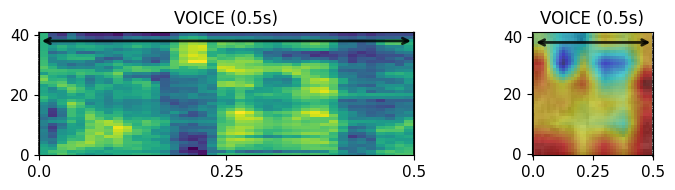

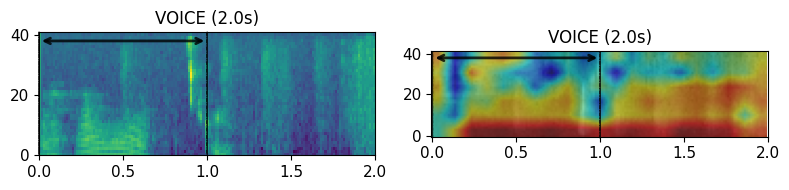

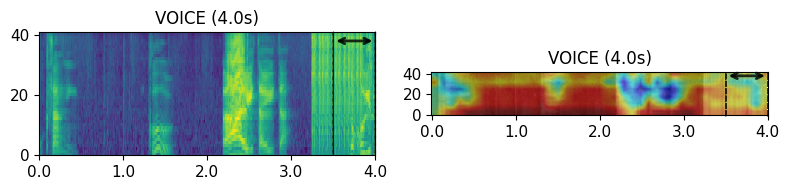

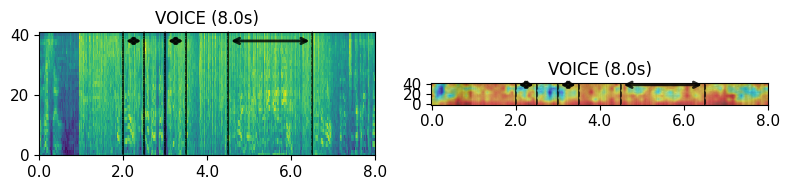

In [11]:
# Row-0
event_type = 'voice'
out_voice = []
for duration in [0.5, 2.0, 4.0, 8.0]: # 13 10 11 12
    window = int(duration / 0.5)

    source_dir = '/data/sung/dataset/dongwoon/label_0.5/%s' %event_type
    label_dict = dict(np.load('/data/sung/dataset/dongwoon/label_%.1f/meta_dict_%s.npz' %(duration, event_type)))
    source_list = label_dict['1']

    for ix, source in enumerate(source_list):
        data = dict(np.load(os.path.join(source_dir, source[0])))
        signal = data['audio'][int(source[1]):int(source[1]) + window].reshape(-1)
        label_list = data['label'][int(source[1]):int(source[1]) + window]
        mel_spec = extract_mel_spec(signal, 16000)
        
        mel_spec_rgb = np.tile(np.expand_dims(mel_spec, axis=-1), (1,1,3))
        gradcam = np.squeeze(np.load('/data/sung/dataset/dongwoon/gradcam/label_%.1f/%s/%s_%d.npy' %(duration, event_type, source[0].rstrip('.npz'), int(source[1]))))
        overlay_img = overlay_heatmap(mel_spec_rgb, gradcam)
        
        out_voice.append([mel_spec, overlay_img, label_list, event_type, duration, ix])
        break    

for out in out_voice:
    mel_spec, overlay_img, label_list, event_type, duration, ix = out
    # save_path = './vis_result/%s/%.1f/%d.png' %(event_type, duration, ix)
    # os.makedirs(os.path.dirname(save_path), exist_ok=True)
    
    fig, axes = plt.subplots(1, 2, figsize=(8, 2))
    
    draw_melspec(mel_spec, label_list, event_type, duration, axes, 0, 0, draw_type='mel')
    draw_melspec(overlay_img, label_list, event_type, duration, axes, 0, 1, draw_type='heatmap')
    
    plt.tight_layout()
    # plt.savefig(save_path, dpi=300)    

## GradCAM Results

In [23]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

def extract_mel_spec(signal, sample_rate=16000):
    # In Annotation
    unit_time = 0.25

    # Load wav file into numpy array
    duration = (len(signal) / sample_rate // unit_time) * unit_time

    start_time = 0
    signal = signal[int(start_time * sample_rate):int((start_time + duration) * sample_rate)]

    pre_emphasis = 0.97
    emphasized_signal = np.append(signal[0], signal[1:] - pre_emphasis * signal[:-1])

    # Framing
    frame_size = 0.025
    frame_stride = frame_size / 2

    frame_length, frame_step = frame_size * sample_rate, frame_stride * sample_rate  # Convert from seconds to samples
    signal_length = len(emphasized_signal)
    frame_length = int(round(frame_length))
    frame_step = int(round(frame_step))
    num_frames = 3 + (signal_length - frame_length) // frame_step # padding 2 frames
    # num_frames = int(np.ceil(float(np.abs(signal_length - frame_length)) / frame_step))
    z = np.zeros(int(frame_length / 2))
    pad_signal = np.concatenate([z, emphasized_signal, z]) # Pad Signal to make sure that all frames have equal number of samples without truncating any samples from the original signal

    indices = np.tile(np.arange(0, frame_length), (num_frames, 1)) + np.tile(np.arange(0, num_frames * frame_step, frame_step), (frame_length, 1)).T
    num_time_bin = indices.shape[0]
    
    frames = pad_signal[indices.astype(np.int32, copy=False)]

    # Hamming Window
    frames *= np.hamming(frame_length)

    # Fourier-Transform and Power Spectrum
    NFFT = 512

    mag_frames = np.absolute(np.fft.rfft(frames, NFFT))  # Magnitude of the FFT
    spec_frames = mag_frames**2

    weighting = np.hanning(frame_length)[:, None]
    scale = np.sum(weighting**2) * sample_rate
    spec_frames[1:-1, :] *= (2.0 / scale)
    spec_frames[(0, -1), :] /= scale

    freqs = float(sample_rate) / frame_length * np.arange(spec_frames.shape[0])
    eps = 1e-14
    spectrogram = np.transpose(np.log(spec_frames + eps))

    # Mel    
    nfilt = 41
    pow_frames = ((1.0 / NFFT) * ((mag_frames) ** 2))  # Power Spectrum
    min_freq = 300
    max_freq = 8000

    low_freq_mel = (2595 * np.log10(1 + min_freq / 700))
    high_freq_mel = (2595 * np.log10(1 + max_freq / 700))  # Convert Hz to Mel
    mel_points = np.linspace(low_freq_mel, high_freq_mel, nfilt + 2)  # Equally spaced in Mel scale
    hz_points = (700 * (10**(mel_points / 2595) - 1))  # Convert Mel to Hz
    bin = np.floor((NFFT + 1) * hz_points / sample_rate)

    fbank = np.zeros((nfilt, int(np.floor(NFFT / 2 + 1))))
    for m in range(1, nfilt + 1):
        f_m_minus = int(bin[m - 1])   # left
        f_m = int(bin[m])             # center
        f_m_plus = int(bin[m + 1])    # right

        for k in range(f_m_minus, f_m):
            fbank[m - 1, k] = (k - bin[m - 1]) / (bin[m] - bin[m - 1])
        for k in range(f_m, f_m_plus):
            fbank[m - 1, k] = (bin[m + 1] - k) / (bin[m + 1] - bin[m])
    filter_banks = np.dot(pow_frames, fbank.T)
    filter_banks = np.where(filter_banks == 0, np.finfo(float).eps, filter_banks)  # Numerical Stability
    filter_banks = 20 * np.log10(filter_banks)  # dB

    filter_banks = filter_banks.T
    return filter_banks

In [24]:
def overlay_heatmap(img, heatmap):
    heatmap = np.uint8(heatmap * 255)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    heatmap = np.float32(heatmap) / 255
    
    cam = heatmap * 0.5 + (img / 255) * 0.5
    # cam = cam / np.max(cam)
    cam = np.uint8(255 * cam)
    return cam

def draw_melspec(mel_spec, label_list, event_type, duration, axes, row, col, draw_type='mel'):
    title_size = 14
    label_size = 15

    ix = row * 4 + col
    ax = axes.flatten()[ix]
    
    if draw_type == 'mel':
        ax.pcolor(mel_spec[:, :-1])
        ax.set_yticks([0, 20, 40])
    else:
        ax.imshow(mel_spec[:, :-1])
        ax.set_yticks([1, 20, 40])
        ax.set_yticklabels([40, 20, 0])
        

    if duration == 0.5:
        time_stamps = [0, 40]
    elif duration == 2.0:
        time_stamps = [0, 40, 80, 120, 160]
    elif duration == 4.0:
        time_stamps = [0, 80, 160, 240, 320]
    elif duration == 8.0:
        time_stamps = [0, 160, 320, 480, 640]
    else:
        raise('Select Proper Duration')

    time_stamp_labels = np.array(time_stamps) / 80.
    ax.set_xticks(time_stamps)
    ax.set_xticklabels(time_stamp_labels)
    ax.set_aspect('equal', 'box')

    ylim = 41
    label_index_list = []
    label_old = 0
    label_new = []

    for ix, label in enumerate(label_list):
        if label == 1:
            if label_old != 1:
                label_new = [ix]
            else:
                label_new.append(ix)
        else:
            if label_old == 1:
                label_index_list.append(label_new)
                label_new = []
            else:
                continue

        label_old = label
    
    # for Last element
    if label_old == 1:
        label_new.append(ix+1)
        label_index_list.append(label_new)
        label_new = []

    alpha = 0.8
    margin = 0.2
    for index in label_index_list:
        if len(index) == 1:
            if draw_type == 'mel':
                ax.annotate("", xy=(40 * index[0], ylim * (1-margin)), xytext=(40 * index[0] + 40, ylim * (1-margin)), arrowprops=dict(arrowstyle="<->", alpha=alpha, lw=4))
            else:
                ax.annotate("", xy=(40 * index[0], ylim * margin), xytext=(40 * index[0] + 40, ylim * margin), arrowprops=dict(arrowstyle="<->", alpha=alpha, lw=4))
            ax.annotate("", (40 * index[0], 0), xytext=(40 * index[0], 41), rotation=90, va='top', arrowprops = {'width': 0, 'headwidth': 0, 'linestyle': '--', 'alpha':alpha})
            ax.annotate("", (40 * index[0]+40, 0), xytext=(40 * index[0]+40, 41), rotation=90, va='top', arrowprops = {'width': 0, 'headwidth': 0, 'linestyle': '--', 'alpha':alpha})
        else:
            if draw_type == 'mel':
                ax.annotate("", xy=(40 * index[0], ylim * (1-margin)), xytext=(40 * index[-1], ylim * (1-margin)), arrowprops=dict(arrowstyle="<->", alpha=alpha, lw=4))
            else:
                ax.annotate("", xy=(40 * index[0], ylim * margin), xytext=(40 * index[-1], ylim * margin), arrowprops=dict(arrowstyle="<->", alpha=alpha, lw=4))
            ax.annotate("", (40 * index[0], 0), xytext=(40 * index[0], 41), rotation=90, va='top', arrowprops = {'width': 0, 'headwidth': 0, 'linestyle': '--', 'alpha':alpha})
            ax.annotate("", (40 * index[-1], 0), xytext=(40 * index[-1], 41), rotation=90, va='top', arrowprops = {'width': 0, 'headwidth': 0, 'linestyle': '--', 'alpha':alpha})
        
        ax.xaxis.set_tick_params(labelsize=label_size)
        ax.yaxis.set_tick_params(labelsize=label_size)
        
        # if ix == 0:
        #     ax.set_ylabel('Mel Filter', fontsize=y_size)
        # ax.set_xlabel('Time (s)', fontsize=x_size)
        
        if event_type == 'voice':
            letter = 'VOICE'
        elif event_type == 'event':
            letter = 'WEAPON'
        
        ax.set_title('%s (%.1fs)' %(letter, duration), fontsize=title_size, pad=10)

In [25]:
# Row-0
event_type = 'voice'
out_0 = []
for ix, (duration, index) in enumerate(zip([0.5, 2.0, 4.0, 8.0], [81, 294, 286, 0])): # 13 10 11 12
    window = int(duration / 0.5)

    source_dir = '/data/sung/dataset/dongwoon/label_0.5/%s' %event_type
    label_dict = dict(np.load('/data/sung/dataset/dongwoon/label_%.1f/meta_dict_%s.npz' %(duration, event_type)))
    source_list = label_dict['1']

    source = source_list[index]
    data = dict(np.load(os.path.join(source_dir, source[0])))
    signal = data['audio'][int(source[1]):int(source[1]) + window].reshape(-1)
    label_list = data['label'][int(source[1]):int(source[1]) + window]
    mel_spec = extract_mel_spec(signal, 16000)
    
    mel_spec_rgb = np.tile(np.expand_dims(mel_spec, axis=-1), (1,1,3))
    gradcam = np.squeeze(np.load('/data/sung/dataset/dongwoon/gradcam/label_%.1f/%s/%s_%d.npy' %(duration, event_type, source[0].rstrip('.npz'), int(source[1]))))
    overlay_img = overlay_heatmap(mel_spec_rgb, gradcam)
    out_0.append([overlay_img, mel_spec, label_list, event_type, duration, 0, ix])
    
    
# Row-1
event_type = 'voice'
out_1 = []
for ix, (duration, index) in enumerate(zip([0.5, 2.0, 4.0, 8.0], [88, 301, 301, 4])):
    window = int(duration / 0.5)

    source_dir = '/data/sung/dataset/dongwoon/label_0.5/%s' %event_type
    label_dict = dict(np.load('/data/sung/dataset/dongwoon/label_%.1f/meta_dict_%s.npz' %(duration, event_type)))
    source_list = label_dict['1']

    source = source_list[index]
    data = dict(np.load(os.path.join(source_dir, source[0])))
    signal = data['audio'][int(source[1]):int(source[1]) + window].reshape(-1)
    label_list = data['label'][int(source[1]):int(source[1]) + window]
    mel_spec = extract_mel_spec(signal, 16000)
    
    mel_spec_rgb = np.tile(np.expand_dims(mel_spec, axis=-1), (1,1,3))
    gradcam = np.squeeze(np.load('/data/sung/dataset/dongwoon/gradcam/label_%.1f/%s/%s_%d.npy' %(duration, event_type, source[0].rstrip('.npz'), int(source[1]))))
    overlay_img = overlay_heatmap(mel_spec_rgb, gradcam)
    out_1.append([overlay_img, mel_spec, label_list, event_type, duration, 1, ix])
    

# Row-2
event_type = 'event'
out_2 = []
for ix, (duration, index) in enumerate(zip([0.5, 2.0, 4.0, 8.0], [97, 213, 188, 60])): # 4 0 0 200
    window = int(duration / 0.5)

    source_dir = '/data/sung/dataset/dongwoon/label_0.5/%s' %event_type
    label_dict = dict(np.load('/data/sung/dataset/dongwoon/label_%.1f/meta_dict_%s.npz' %(duration, event_type)))
    source_list = label_dict['1']

    source = source_list[index]
    data = dict(np.load(os.path.join(source_dir, source[0])))
    signal = data['audio'][int(source[1]):int(source[1]) + window].reshape(-1)
    label_list = data['label'][int(source[1]):int(source[1]) + window]
    mel_spec = extract_mel_spec(signal, 16000)

    mel_spec_rgb = np.tile(np.expand_dims(mel_spec, axis=-1), (1,1,3))
    gradcam = np.squeeze(np.load('/data/sung/dataset/dongwoon/gradcam/label_%.1f/%s/%s_%d.npy' %(duration, event_type, source[0].rstrip('.npz'), int(source[1]))))
    overlay_img = overlay_heatmap(mel_spec_rgb, gradcam)
    
    out_2.append([overlay_img, mel_spec, label_list, event_type, duration, 2, ix])
    
    
# Row-3
event_type = 'event'
out_3 = []
for ix, (duration, index) in enumerate(zip([0.5, 2.0, 4.0, 8.0], [16, 61, 94, 42])): # 1, 1, 1, 33
    window = int(duration / 0.5)

    source_dir = '/data/sung/dataset/dongwoon/label_0.5/%s' %event_type
    label_dict = dict(np.load('/data/sung/dataset/dongwoon/label_%.1f/meta_dict_%s.npz' %(duration, event_type)))
    source_list = label_dict['1']

    source = source_list[index]
    data = dict(np.load(os.path.join(source_dir, source[0])))
    
    signal = data['audio'][int(source[1]):int(source[1]) + window].reshape(-1)
    label_list = data['label'][int(source[1]):int(source[1]) + window]

    mel_spec = extract_mel_spec(signal, 16000)
    
    mel_spec_rgb = np.tile(np.expand_dims(mel_spec, axis=-1), (1,1,3))
    gradcam = np.squeeze(np.load('/data/sung/dataset/dongwoon/gradcam/label_%.1f/%s/%s_%d.npy' %(duration, event_type, source[0].rstrip('.npz'), int(source[1]))))
    overlay_img = overlay_heatmap(mel_spec_rgb, gradcam)
    
    out_3.append([overlay_img, mel_spec, label_list, event_type, duration, 3, ix])

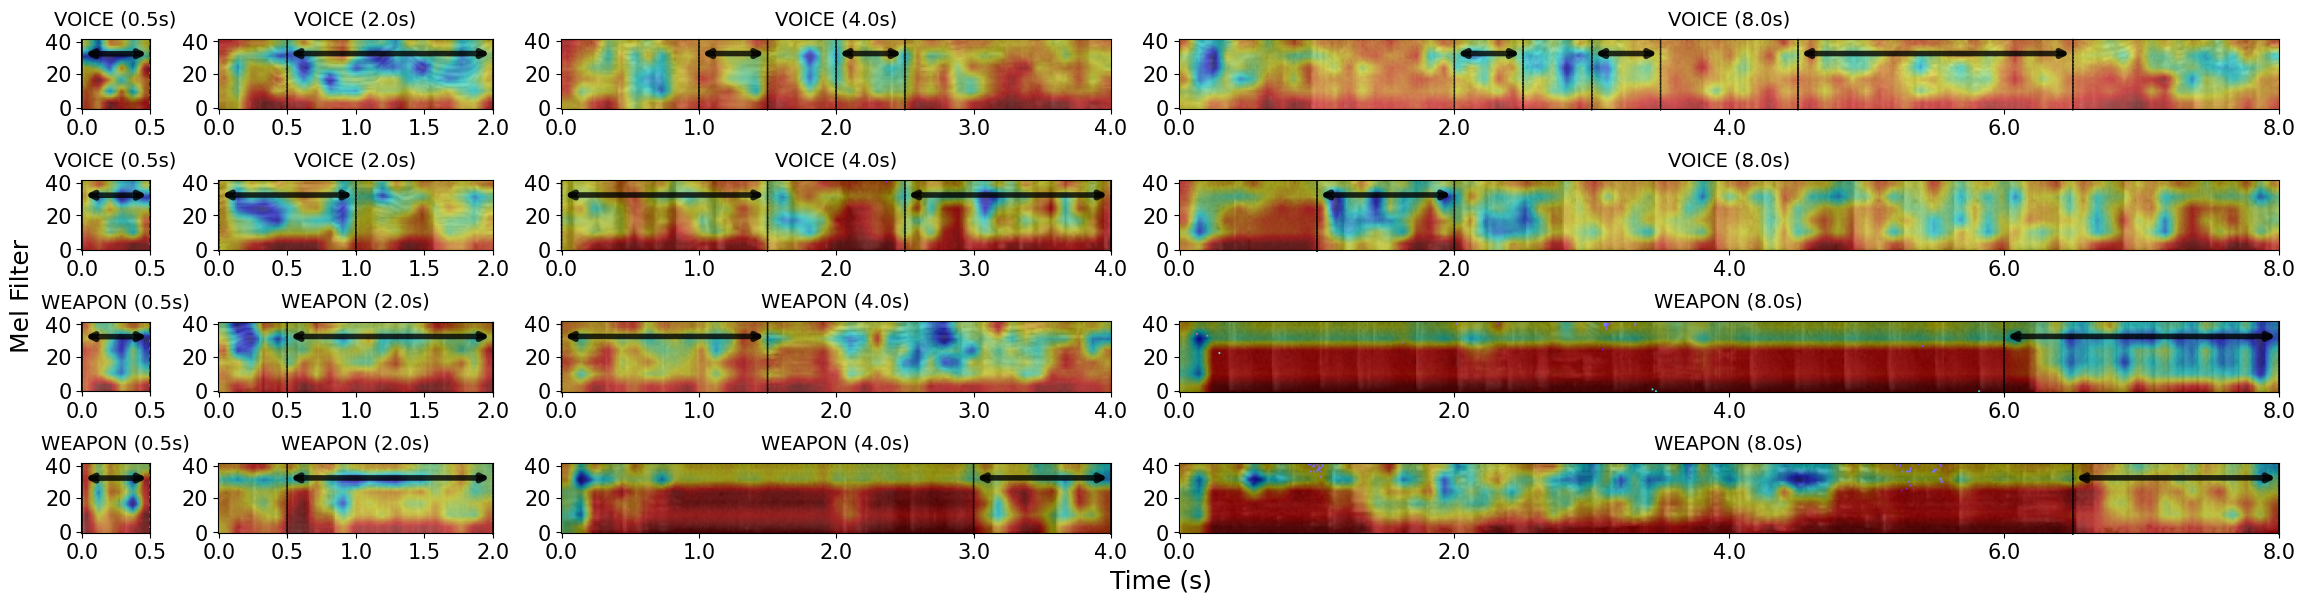

In [26]:
# Figure
row, col = 0, 0
fig, axes = plt.subplots(4,4, figsize=(23, 6), gridspec_kw={'width_ratios': [1, 4, 8, 16]})

for out in out_0:
    over_lay, mel_spec, label_list, event_type, duration, row, col = out
    draw_melspec(over_lay, label_list, event_type, duration, axes, row, col, draw_type='heatmap')
    
for out in out_1:
    over_lay, mel_spec, label_list, event_type, duration, row, col = out
    draw_melspec(over_lay, label_list, event_type, duration, axes, row, col, draw_type='heatmap')

for out in out_2:
    over_lay, mel_spec, label_list, event_type, duration, row, col = out
    draw_melspec(over_lay, label_list, event_type, duration, axes, row, col, draw_type='heatmap')

for out in out_3:
    over_lay, mel_spec, label_list, event_type, duration, row, col = out
    draw_melspec(over_lay, label_list, event_type, duration, axes, row, col, draw_type='heatmap')

# Common X and Y Label
axes[-1, 0].set_xlabel('.', color=(0, 0, 0, 0))
axes[-1, 0].set_ylabel('.', color=(0, 0, 0, 0))
fig.text(0.5, 0.025, 'Time (s)', va='center', ha='center', fontsize=18)
fig.text(0.005, 0.5, 'Mel Filter', va='center', ha='center', rotation='vertical', fontsize=18)
plt.tight_layout()

plt.savefig('fig_resol_gradcam_rev.png', dpi=300)

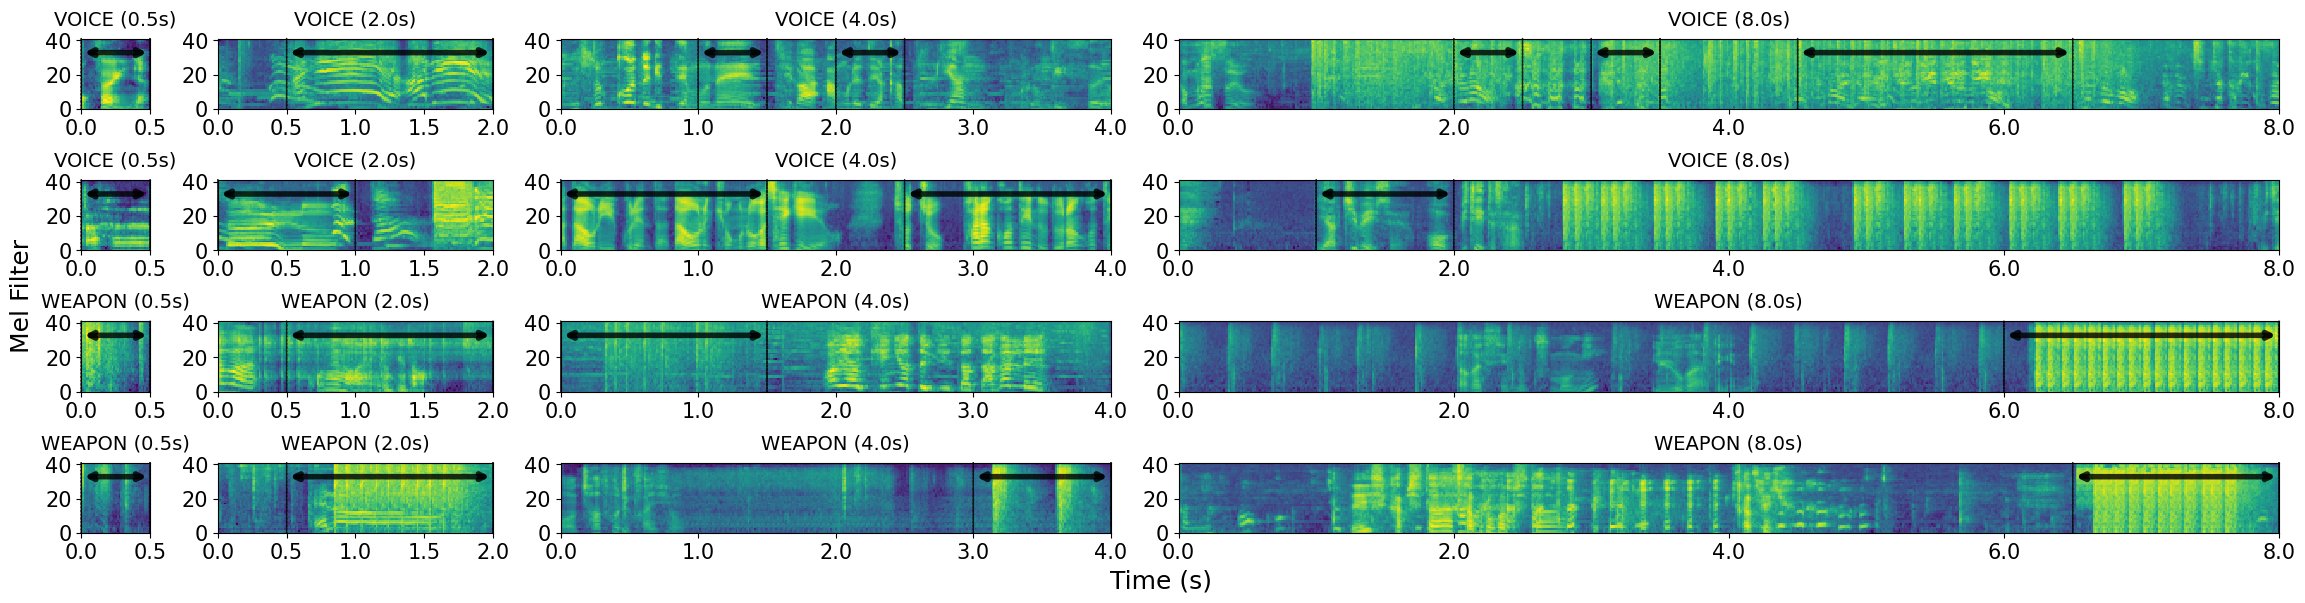

In [27]:
# Figure
row, col = 0, 0
fig, axes = plt.subplots(4,4, figsize=(23, 6), gridspec_kw={'width_ratios': [1, 4, 8, 16]})


for out in out_0:
    over_lay, mel_spec, label_list, event_type, duration, row, col = out
    draw_melspec(mel_spec, label_list, event_type, duration, axes, row, col, draw_type='mel')
    
for out in out_1:
    over_lay, mel_spec, label_list, event_type, duration, row, col = out
    draw_melspec(mel_spec, label_list, event_type, duration, axes, row, col, draw_type='mel')

for out in out_2:
    over_lay, mel_spec, label_list, event_type, duration, row, col = out
    draw_melspec(mel_spec, label_list, event_type, duration, axes, row, col, draw_type='mel')

for out in out_3:
    over_lay, mel_spec, label_list, event_type, duration, row, col = out
    draw_melspec(mel_spec, label_list, event_type, duration, axes, row, col, draw_type='mel')

# Common X and Y Label
axes[-1, 0].set_xlabel('.', color=(0, 0, 0, 0))
axes[-1, 0].set_ylabel('.', color=(0, 0, 0, 0))
fig.text(0.5, 0.025, 'Time (s)', va='center', ha='center', fontsize=18)
fig.text(0.005, 0.5, 'Mel Filter', va='center', ha='center', rotation='vertical', fontsize=18)
plt.tight_layout()

plt.savefig('fig_resol_samples_rev.png', dpi=300)

## SNR

In [1]:
import numpy as np
def signaltonoise_dB(a, axis=0, ddof=0):
    a = np.asanyarray(a)
    m = a.mean(axis)
    sd = a.std(axis=axis, ddof=ddof)
    return 20*np.log10(abs(np.where(sd == 0, 0, m/sd)))

In [4]:
from glob import glob
data_list = glob('/data/sung/dataset/dongwoon/val/*.npz')[:10]

for id, data in enumerate(data_list):
    data = dict(np.load(data))['audio']
    snr = signaltonoise_dB(data)
    print(snr)

-88.03316169972302
-78.27118370045667
-65.9818356760252
-41.082430045032396
-63.049789758170846
-67.91217365293834
-35.65207086541983
-41.290644891897955
-52.15332485007086
-76.92761696502518


## Revision (1D Figure 7)

In [16]:
import numpy as np
# Row-0
event_type = 'voice'
out_0 = []
for ix, (duration, index) in enumerate(zip([0.5, 2.0, 4.0, 8.0], [81, 294, 286, 0])): # 13 10 11 12
    window = int(duration / 0.5)

    source_dir = '/data/sung/dataset/dongwoon/label_0.5/%s' %event_type
    label_dict = dict(np.load('/data/sung/dataset/dongwoon/label_%.1f/meta_dict_%s.npz' %(duration, event_type)))
    source_list = label_dict['1']

    source = source_list[index]
    data = dict(np.load(os.path.join(source_dir, source[0])))
    signal = data['audio'][int(source[1]):int(source[1]) + window].reshape(-1)
    label_list = data['label'][int(source[1]):int(source[1]) + window]
    out_0.append([None, signal, label_list, event_type, duration, 0, ix])
    
    
# Row-1
event_type = 'voice'
out_1 = []
for ix, (duration, index) in enumerate(zip([0.5, 2.0, 4.0, 8.0], [88, 301, 301, 4])):
    window = int(duration / 0.5)

    source_dir = '/data/sung/dataset/dongwoon/label_0.5/%s' %event_type
    label_dict = dict(np.load('/data/sung/dataset/dongwoon/label_%.1f/meta_dict_%s.npz' %(duration, event_type)))
    source_list = label_dict['1']

    source = source_list[index]
    data = dict(np.load(os.path.join(source_dir, source[0])))
    signal = data['audio'][int(source[1]):int(source[1]) + window].reshape(-1)
    label_list = data['label'][int(source[1]):int(source[1]) + window]
    out_1.append([None, signal, label_list, event_type, duration, 1, ix])
    

# Row-2
event_type = 'event'
out_2 = []
for ix, (duration, index) in enumerate(zip([0.5, 2.0, 4.0, 8.0], [97, 213, 188, 60])): # 4 0 0 200
    window = int(duration / 0.5)

    source_dir = '/data/sung/dataset/dongwoon/label_0.5/%s' %event_type
    label_dict = dict(np.load('/data/sung/dataset/dongwoon/label_%.1f/meta_dict_%s.npz' %(duration, event_type)))
    source_list = label_dict['1']

    source = source_list[index]
    data = dict(np.load(os.path.join(source_dir, source[0])))
    signal = data['audio'][int(source[1]):int(source[1]) + window].reshape(-1)
    label_list = data['label'][int(source[1]):int(source[1]) + window]
    out_2.append([None, signal, label_list, event_type, duration, 2, ix])
    
    
# Row-3
event_type = 'event'
out_3 = []
for ix, (duration, index) in enumerate(zip([0.5, 2.0, 4.0, 8.0], [16, 61, 94, 42])): # 1, 1, 1, 33
    window = int(duration / 0.5)

    source_dir = '/data/sung/dataset/dongwoon/label_0.5/%s' %event_type
    label_dict = dict(np.load('/data/sung/dataset/dongwoon/label_%.1f/meta_dict_%s.npz' %(duration, event_type)))
    source_list = label_dict['1']

    source = source_list[index]
    data = dict(np.load(os.path.join(source_dir, source[0])))
    
    signal = data['audio'][int(source[1]):int(source[1]) + window].reshape(-1)
    label_list = data['label'][int(source[1]):int(source[1]) + window]
    out_3.append([None, signal, label_list, event_type, duration, 3, ix])

In [19]:
## Revision
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

def draw_signal(wav, label_list, event_type, duration, axes, row, col):
    # Visualize Audio Signal
    sr = 16000
    t = np.array(list(range(0, len(wav)))) / sr

    title_size = 16
    label_size = 15
    
    ix = row * 4 + col
    ax = axes.flatten()[ix]
    ax.plot(t, wav, color='blue', alpha=0.7)
    ax.grid(True, linewidth= 0.5, linestyle="--")

    ylim = 30000
    ax.set_yticks([-ylim, 0, ylim])    
    ax.set_yticklabels(["-30,000", "0", "30,000"])    
    
    
    # if duration == 0.5:
        # ax.set_xticks([-ylim, 0, ylim])    
        
    
    
    # ax.set_ylim([-30000, 30000])
    
    ax.set_xlim()
    
    ax.xaxis.set_tick_params(labelsize=label_size)
    ax.yaxis.set_tick_params(labelsize=label_size)
    # ax.set_aspect('equal', 'box')
    
    
    if event_type == 'voice':
        letter = 'VOICE'
    elif event_type == 'event':
        letter = 'WEAPON'
    ax.set_title('%s (%.1fs)' %(letter, duration), fontsize=title_size, pad=10)    
    

    label_index_list = []
    label_old = 0
    label_new = []
    
    for ix, label in enumerate(label_list):
        if label == 1:
            if label_old != 1:
                label_new = [ix]
            else:
                label_new.append(ix)
        else:
            if label_old == 1:
                label_index_list.append(label_new)
                label_new = []
            else:
                continue

        label_old = label
    
    # for Last element
    if label_old == 1:
        label_new.append(ix+1)
        label_index_list.append(label_new)
        label_new = []

    alpha = 0.8
    margin = 0.2
    draw_type='mel'
    for index in label_index_list:
        if len(index) == 1:
            if draw_type == 'mel':
                ax.annotate("", xy=(0.5 * index[0], ylim * (1-margin)), xytext=(0.5 * index[0] + 0.5, ylim * (1-margin)), arrowprops=dict(arrowstyle="<->", alpha=alpha, lw=4))
            else:
                ax.annotate("", xy=(0.5 * index[0], ylim * margin), xytext=(0.5 * index[0] + 0.5, ylim * margin), arrowprops=dict(arrowstyle="<->", alpha=alpha, lw=4))
            ax.annotate("", (0.5 * index[0], 0), xytext=(0.5 * index[0], ylim), rotation=90, va='top', arrowprops = {'width': 0, 'headwidth': 0, 'linestyle': '--', 'alpha':alpha})
            ax.annotate("", (0.5 * index[0]+0.5, 0), xytext=(0.5 * index[0]+0.5, ylim), rotation=90, va='top', arrowprops = {'width': 0, 'headwidth': 0, 'linestyle': '--', 'alpha':alpha})
        else:
            if draw_type == 'mel':
                ax.annotate("", xy=(0.5 * index[0], ylim * (1-margin)), xytext=(0.5 * index[-1], ylim * (1-margin)), arrowprops=dict(arrowstyle="<->", alpha=alpha, lw=4))
            else:
                ax.annotate("", xy=(0.5 * index[0], ylim * margin), xytext=(0.5 * index[-1], ylim * margin), arrowprops=dict(arrowstyle="<->", alpha=alpha, lw=4))
                
            ax.annotate("", (0.5 * index[0], 0), xytext=(0.5 * index[0], ylim), rotation=90, va='top', arrowprops = {'width': 0, 'headwidth': 0, 'linestyle': '--', 'alpha':alpha})
            ax.annotate("", (0.5 * index[-1], 0), xytext=(0.5 * index[-1], ylim), rotation=90, va='top', arrowprops = {'width': 0, 'headwidth': 0, 'linestyle': '--', 'alpha':alpha})

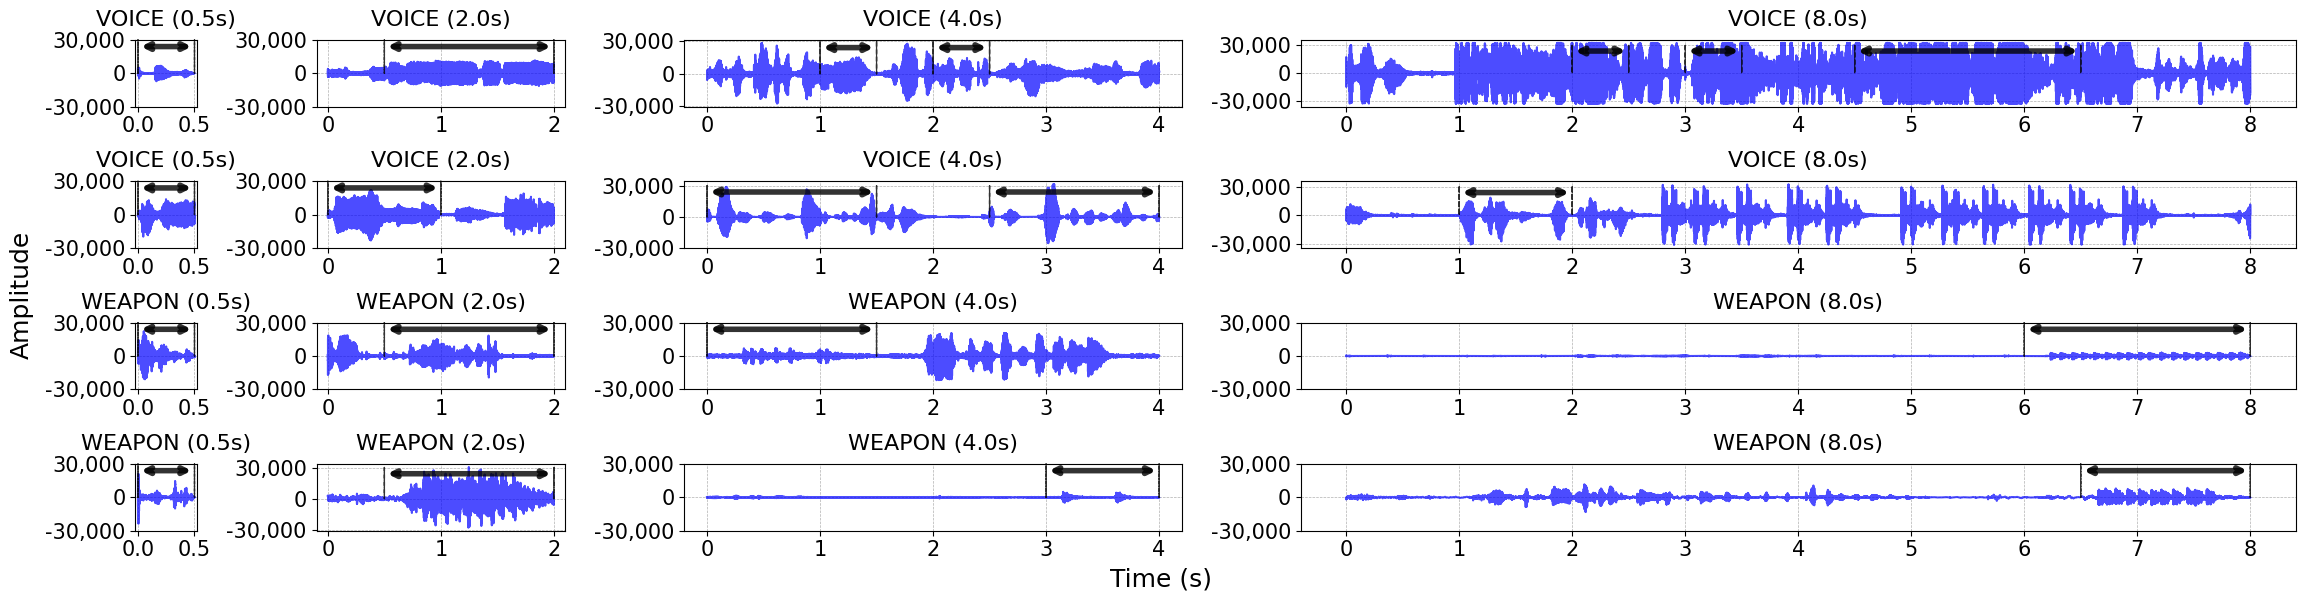

In [20]:
# Figure
row, col = 0, 0
fig, axes = plt.subplots(4,4, figsize=(23, 6), gridspec_kw={'width_ratios': [1, 4, 8, 16]})


for out in out_0:
    over_lay, wav, label_list, event_type, duration, row, col = out
    draw_signal(wav, label_list, event_type, duration, axes, row, col)
    
for out in out_1:
    over_lay, wav, label_list, event_type, duration, row, col = out
    draw_signal(wav, label_list, event_type, duration, axes, row, col)

for out in out_2:
    over_lay, wav, label_list, event_type, duration, row, col = out
    draw_signal(wav, label_list, event_type, duration, axes, row, col)

for out in out_3:
    over_lay, wav, label_list, event_type, duration, row, col = out
    draw_signal(wav, label_list, event_type, duration, axes, row, col)

# Common X and Y Label
axes[-1, 0].set_xlabel('.', color=(0, 0, 0, 0))
axes[-1, 0].set_ylabel('.', color=(0, 0, 0, 0))
fig.text(0.5, 0.025, 'Time (s)', va='center', ha='center', fontsize=18)
fig.text(0.005, 0.5, 'Amplitude', va='center', ha='center', rotation='vertical', fontsize=18)
plt.tight_layout()

plt.savefig('fig_resol_samples.png', dpi=300)